In [63]:
class Operation():
    
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
        
    def compute(self):
        pass


In [64]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,var_x, var_y):
        self.inputes = [var_x, var_y]
        return (var_x + var_y)

In [65]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,var_x, var_y):
        self.inputes = [var_x, var_y]
        return (var_x * var_y)

In [66]:
class matrixMultiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,var_x, var_y):
        self.inputes = [var_x, var_y]
        return (var_x.dot(var_y))
    

In [67]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [68]:
class Variable():
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [69]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.variables = []
        self.placeholders = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self
        

In [70]:
#GeneralFormula
#z = ax+b 
#where z = operating func.
#a = value of the nodes
#x = weight 
#b = bias term

#sigma(z) = activation function

#z = Ax + b

#A = 10

#b = 1

#z = 10x + 1



In [71]:
g = Graph()

In [72]:
g.set_as_default()

In [73]:
A = Variable(10)

In [74]:
b = Variable(1)

In [75]:
x = Placeholder()

In [76]:
y = multiply(A,x)

In [77]:
z = add(y,b)

In [78]:
def traverse_postorder(operation):
    #Post_order Traversal of Nodes: Basically make sure computations are done in the correct order(Ax first, then Ax+b). 
    
    nodes_postorder= []
    
    def recurse(node):
        if isinstance(node, operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
    
    recurse(operation)
    return nodes_postorder

In [79]:
import numpy as np

class Session():
    
    def run(self,operation,feed_dict={}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            
            elif type(node) == Variable:
                node.output = node.value
            
            else:
                #operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            
            if type(node.output) == list:
                node.output == np.array(node.output)
        
        return operation.output

In [80]:
sess = Session()

In [81]:
result = sess.run(operation = z, feed_dict = {x:10} )
result

TypeError: isinstance() arg 2 must be a type or tuple of types

In [82]:
g = Graph()
g.set_as_default()

A = Variable([10,20],[30,40])
b = Variable([1,2])

x = Placeholder()
y = matrixMultiply(A,x)
z = add(y,b)

TypeError: __init__() takes from 1 to 2 positional arguments but 3 were given

In [83]:
sess = Session()

In [84]:
sess.run(operation = z, feed_dict={x:10})

TypeError: isinstance() arg 2 must be a type or tuple of types

In [85]:
##CLASSIFIER
##Activation Function

In [86]:
import matplotlib.pyplot as plt

In [87]:
%matplot inline

UsageError: Line magic function `%matplot` not found.


In [88]:
def sigmoid(z):
    return 1/ (1 +np.exp(-z))

In [89]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

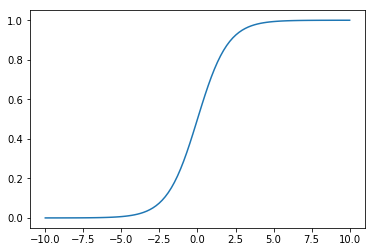

In [90]:
plt.plot(sample_z,sample_a)

In [91]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        super().__init__([z])
        
    def compute(self, z_val):
        return 1 / (1+np.exp(-z_val))
    

In [92]:
from sklearn.datasets import make_blobs

In [93]:
data = make_blobs(n_samples = 50, n_features = 2, centers = 2, random_state = 75 )

In [94]:
type(data)

tuple

In [95]:
data[1]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1])

In [96]:
features = data[0]
labels = data[1]

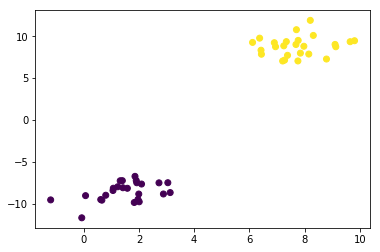

In [97]:
plt.scatter(features[:,0], features[:,1], c= labels)

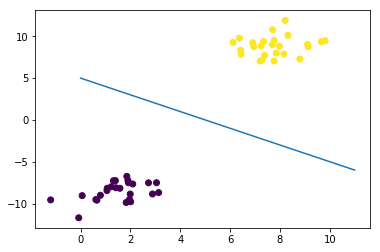

In [98]:
x = np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0], features[:,1], c= labels)
plt.plot(x,y)

In [99]:
#(1,1)* feature - 5 = 0

In [100]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

In [101]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

array([-13])

In [102]:
g = Graph()
g.set_as_default()

In [103]:
x = Placeholder()

In [104]:
w = Variable([1,1])
b = Variable(-5)

In [105]:
z = add(matrixMultiply(w,x),b)

In [106]:
a = Sigmoid(z)

In [107]:
sess = Session()

In [108]:
sess.run(operation=a,feed_dict={x:[8,10]})

TypeError: isinstance() arg 2 must be a type or tuple of types